In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw(x1,x2):
    ln = plt.plot(x1,x2)
    
    
def sigmoid(score):
    return 1/(1+np.exp(-score))

def calculate_error(line_parameters,points,y):
    m=points.shape[0]
    p = sigmoid(points*line_parameters)
    cross_entropy = 1/m*(np.log(p).T*y + np.log(1-p).T*(1-y))
    return cross_entropy

def gradient_descent(line_parameters,points,y,alpha):
    m = points.shape[0]
    for i in range(2000):
        p = sigmoid(points*line_parameters)
        gradient = (points.T*(p-y)*(alpha/m))
        line_parameters = line_parameters-gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        x1 = np.array([points[:,0].min(),points[:,0].max()])
        x2 = ((- b / w2) + x1 * (- w1 / w2))
    draw(x1,x2)  

In [3]:
n_pts=100
np.random.seed(0)
bias = np.ones(n_pts)
top_region = np.array([np.random.normal(10,2,n_pts)
                       ,np.random.normal(12,2,n_pts),bias]).T
bottom_region = np.array([np.random.normal(5,2,n_pts)
                       ,np.random.normal(6,2,n_pts),bias]).T
all_points = np.vstack((top_region,bottom_region))

# w1 = -0.1
# w2 = -0.15
# b = 0
line_parameters = np.matrix([np.zeros(3)]).T
# x1 = np.array([bottom_region[:,0].min(),top_region[:,0].max()])
# x2 = ((- b / w2) + x1 * (- w1 / w2))

# print(x1,x2,all_points.shape,line_parameters.shape)
# linear_combination = all_points*line_parameters
# probabilities = sigmoid(linear_combination)
# print(probabilities)
y=np.array([np.zeros(n_pts),np.ones(n_pts)]).reshape(n_pts*2,1)


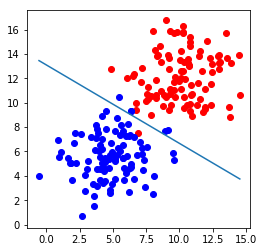

In [4]:
_,ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0],top_region[:,1],color='r')
ax.scatter(bottom_region[:,0],bottom_region[:,1],color='b')
# draw(x1,x2)
gradient_descent(line_parameters,all_points,y,0.06)
plt.show()

In [5]:
calculate_error(line_parameters,all_points,y)

matrix([[-0.69314718]])

# see keras before this

# deep neural network

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

/home/rj/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
np.random.seed(0)

In [8]:
n_pts = 500
X,y = datasets.make_circles(n_samples=n_pts,random_state=123
                            ,noise=0.1,factor=0.2)


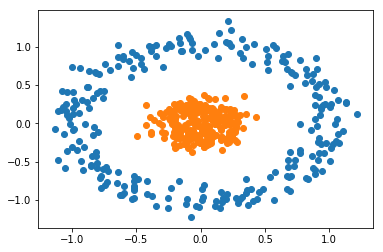

In [9]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [10]:
model = Sequential()
model.add(Dense(4,input_shape=(2,),activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(Adam(lr=0.01),'binary_crossentropy',
             metrics=['accuracy'])

In [11]:
h = model.fit(x=X,y=y,verbose=1,batch_size=20,epochs=100,
          shuffle=True)

Epoch 1/100
500/500 [==============================] - 0s 774us/step - loss: 0.6960 - acc: 0.5100
Epoch 2/100
500/500 [==============================] - 0s 126us/step - loss: 0.6937 - acc: 0.6200
Epoch 3/100
500/500 [==============================] - 0s 114us/step - loss: 0.6926 - acc: 0.5140
Epoch 4/100
500/500 [==============================] - 0s 119us/step - loss: 0.6916 - acc: 0.6780
Epoch 5/100
500/500 [==============================] - 0s 110us/step - loss: 0.6905 - acc: 0.6320
Epoch 6/100
500/500 [==============================] - 0s 117us/step - loss: 0.6890 - acc: 0.3640
Epoch 7/100
500/500 [==============================] - 0s 145us/step - loss: 0.6865 - acc: 0.6460
Epoch 8/100
500/500 [==============================] - 0s 111us/step - loss: 0.6838 - acc: 0.6740
Epoch 9/100
500/500 [==============================] - 0s 105us/step - loss: 0.6796 - acc: 0.7580
Epoch 10/100
500/500 [==============================] - 0s 105us/step - loss: 0.6734 - acc: 0.7980
Epoch 11/100
500/50

500/500 [==============================] - 0s 221us/step - loss: 0.0312 - acc: 0.9980
Epoch 85/100
500/500 [==============================] - 0s 132us/step - loss: 0.0305 - acc: 0.9980
Epoch 86/100
500/500 [==============================] - 0s 130us/step - loss: 0.0298 - acc: 1.0000
Epoch 87/100
500/500 [==============================] - 0s 178us/step - loss: 0.0290 - acc: 1.0000
Epoch 88/100
500/500 [==============================] - 0s 109us/step - loss: 0.0283 - acc: 1.0000
Epoch 89/100
500/500 [==============================] - 0s 127us/step - loss: 0.0277 - acc: 1.0000
Epoch 90/100
500/500 [==============================] - 0s 137us/step - loss: 0.0270 - acc: 1.0000
Epoch 91/100
500/500 [==============================] - 0s 105us/step - loss: 0.0264 - acc: 1.0000
Epoch 92/100
500/500 [==============================] - 0s 112us/step - loss: 0.0259 - acc: 1.0000
Epoch 93/100
500/500 [==============================] - 0s 127us/step - loss: 0.0253 - acc: 1.0000
Epoch 94/100
500/500 [=

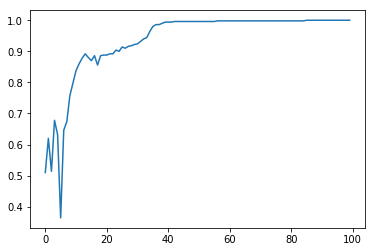

In [12]:
plt.plot(h.history['acc'])

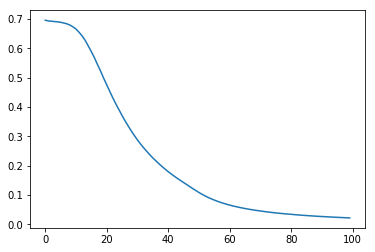

In [13]:
plt.plot(h.history['loss'])

In [14]:
def plot_decision_boundary(X,y,model):
    x_span = np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25,50)
    y_span = np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25,50)
    xx,yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(),yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

array([[0.0251174]], dtype=float32)

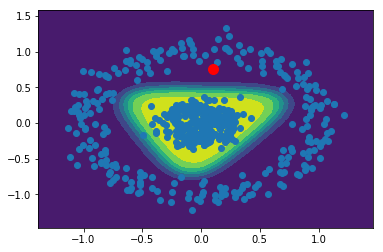

In [15]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

x=0.1
y=0.75
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y],marker='o',markersize=10,color='red')
prediction

# cross entropy and softmax

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [25]:
n_pts = 500
centers = [[-1,1],[-1,-1],[1,-1],[1,1],[0,0]]
X,y = datasets.make_blobs(n_samples=n_pts,random_state=123,
                        centers=centers,cluster_std=0.4)

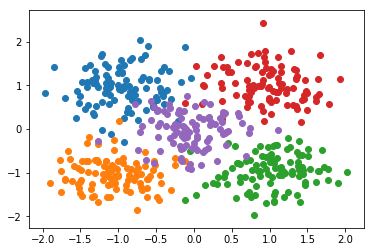

In [26]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])


In [27]:
y_cat = to_categorical(y,5)
y_cat

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [28]:
model = Sequential()
model.add(Dense(units=5,input_shape=(2,),activation='softmax'))
model.compile(Adam(0.1),loss='categorical_crossentropy',metrics=['accuracy'])


In [29]:
model.fit(x=X,y=y_cat,verbose=1,batch_size=50,epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 625us/step - loss: 1.3118 - acc: 0.4020
Epoch 2/100
500/500 [==============================] - 0s 59us/step - loss: 0.6489 - acc: 0.8320
Epoch 3/100
500/500 [==============================] - 0s 63us/step - loss: 0.4301 - acc: 0.8940
Epoch 4/100
500/500 [==============================] - 0s 60us/step - loss: 0.3419 - acc: 0.9260
Epoch 5/100
500/500 [==============================] - 0s 62us/step - loss: 0.2943 - acc: 0.9400
Epoch 6/100
500/500 [==============================] - 0s 55us/step - loss: 0.2692 - acc: 0.9420
Epoch 7/100
500/500 [==============================] - 0s 52us/step - loss: 0.2499 - acc: 0.9380
Epoch 8/100
500/500 [==============================] - 0s 68us/step - loss: 0.2362 - acc: 0.9380
Epoch 9/100
500/500 [==============================] - 0s 60us/step - loss: 0.2272 - acc: 0.9380
Epoch 10/100
500/500 [==============================] - 0s 66us/step - loss: 0.2188 - acc: 0.9400
Epoch 11/100
500/500 [======

500/500 [==============================] - 0s 50us/step - loss: 0.1556 - acc: 0.9460
Epoch 85/100
500/500 [==============================] - 0s 46us/step - loss: 0.1535 - acc: 0.9500
Epoch 86/100
500/500 [==============================] - 0s 45us/step - loss: 0.1529 - acc: 0.9500
Epoch 87/100
500/500 [==============================] - 0s 54us/step - loss: 0.1515 - acc: 0.9500
Epoch 88/100
500/500 [==============================] - 0s 54us/step - loss: 0.1516 - acc: 0.9520
Epoch 89/100
500/500 [==============================] - 0s 47us/step - loss: 0.1520 - acc: 0.9500
Epoch 90/100
500/500 [==============================] - 0s 48us/step - loss: 0.1510 - acc: 0.9520
Epoch 91/100
500/500 [==============================] - 0s 47us/step - loss: 0.1532 - acc: 0.9480
Epoch 92/100
500/500 [==============================] - 0s 44us/step - loss: 0.1508 - acc: 0.9460
Epoch 93/100
500/500 [==============================] - 0s 52us/step - loss: 0.1516 - acc: 0.9520
Epoch 94/100
500/500 [===========

In [30]:
def plot_decision_boundary(X,y_cat,model):
    x_span = np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25,50)
    y_span = np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25,50)
    xx,yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(),yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z) 

array([3])

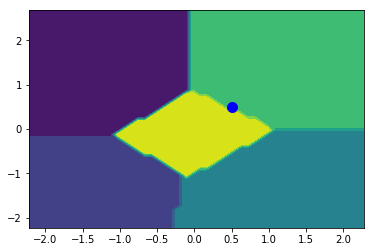

In [32]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])


x=0.5
y=0.5
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x],[y],marker='o',markersize=10,color='b')
prediction

# plt.scatter(X[y==0,0],X[y==0,1])
# plt.scatter(X[y==1,0],X[y==1,1])
# plt.scatter(X[y==2,0],X[y==2,1])
